In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<H5> Pobierz zbiór danych Rain in Australia

In [2]:
ok=False
while ok==False:
    FileName = input('Wpisz ścieżkę do pliku: ')

    try:
        data=pd.read_csv(FileName) 
        ok=True
    except FileNotFoundError:
        print('Nieprawidłowa ścieżka. Spróbuj ponownie: ')
        ok=False
#C:/Users/Ryzen/Desktop/PUM/RainInAustralia/weatherAUS.csv

Wpisz ścieżkę do pliku: C:/Users/Ryzen/Desktop/PUM/RainInAustralia/weatherAUS.csv


In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
Columns_names = data.columns
Columns_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

<h5>Usuń kolumny mające więcej niż 30% brakujących wartości oraz kolumnę 'Risk-MM'

In [5]:
def WhichColumnIs30orMorePercentNaN(Columns_names, data):
    Columns_list = []
    null_values = data.isnull().sum(axis = 0)
    for i in range(len(Columns_names)):
        if (null_values[i]/data.shape[0]) >= 0.3: 
            Columns_list.append(Columns_names[i])
    return Columns_list

In [6]:
Columns_to_del = WhichColumnIs30orMorePercentNaN(Columns_names, data)

In [7]:
Columns_to_del.append('RISK_MM')

In [8]:
print(Columns_to_del)

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RISK_MM']


In [9]:
data2 = data.copy()
data2 = data2.drop(columns = Columns_to_del)

In [10]:
data2

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


<H5><div style="text_align: justify"> Dokonaj imputacji brakujących wartości zakładając że są one MCAR (Missing Completely At Random), tzn. zmienne kategoryczne należy zastąpić dominantą (najczęściej występującą w kolumnie wartością) a numeryczne medianą (wartością środkową w rosnąco posortowanej kolumnie)</div>

In [11]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Temp9am        141289 non-null  float64
 16  Temp3pm        139467 non-null  float64
 17  RainToday      140787 non-nul

Wartości kategoryczne to wartości, które w tej tabeli są typu object, a więc trzeba zmienić ich typ. Wartości numeryczne zawierają kolumny typu float64.

In [12]:
Category_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
#Uwaga! Location też jest daną kategoryczną, jednak jej nie modyfikowałam, gdyż w dalszej części obróbki danych również nie będę jej modyfikować
Numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
#Podobnie dla Date - jest daną numeryczną jednak nie będę na tej kolumnie wykonywać żadnych operacji
data3 = data2.copy()
for i in Category_columns:
    data3 = data3.astype({i : 'category'})

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           142193 non-null  object  
 1   Location       142193 non-null  object  
 2   MinTemp        141556 non-null  float64 
 3   MaxTemp        141871 non-null  float64 
 4   Rainfall       140787 non-null  float64 
 5   WindGustDir    132863 non-null  category
 6   WindGustSpeed  132923 non-null  float64 
 7   WindDir9am     132180 non-null  category
 8   WindDir3pm     138415 non-null  category
 9   WindSpeed9am   140845 non-null  float64 
 10  WindSpeed3pm   139563 non-null  float64 
 11  Humidity9am    140419 non-null  float64 
 12  Humidity3pm    138583 non-null  float64 
 13  Pressure9am    128179 non-null  float64 
 14  Pressure3pm    128212 non-null  float64 
 15  Temp9am        141289 non-null  float64 
 16  Temp3pm        139467 non-null  float64 
 17  RainToday 

In [13]:
data3['Year'] = pd.DatetimeIndex(data3['Date']).year
data3['Month'] = pd.DatetimeIndex(data3['Date']).month
data3['Day'] = pd.DatetimeIndex(data3['Date']).day
data3

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,...,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,...,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,...,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,...,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23


In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           142193 non-null  object  
 1   Location       142193 non-null  object  
 2   MinTemp        141556 non-null  float64 
 3   MaxTemp        141871 non-null  float64 
 4   Rainfall       140787 non-null  float64 
 5   WindGustDir    132863 non-null  category
 6   WindGustSpeed  132923 non-null  float64 
 7   WindDir9am     132180 non-null  category
 8   WindDir3pm     138415 non-null  category
 9   WindSpeed9am   140845 non-null  float64 
 10  WindSpeed3pm   139563 non-null  float64 
 11  Humidity9am    140419 non-null  float64 
 12  Humidity3pm    138583 non-null  float64 
 13  Pressure9am    128179 non-null  float64 
 14  Pressure3pm    128212 non-null  float64 
 15  Temp9am        141289 non-null  float64 
 16  Temp3pm        139467 non-null  float64 
 17  RainToday 

In [15]:
data4 = data3.copy()
for i in Category_columns:
    data4[i].fillna(data3.copy()[i].mode()[0], inplace=True)

In [16]:
data4[Category_columns].isna().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [17]:
for i in Numeric_columns:
    data4[i].fillna(data3.copy()[i].median(), inplace=True)

data4[Numeric_columns].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

<h5> Obetnij obserwacje odstające więcej niż 1.5 rozstępu ćwiartkowego

Rozstęp ćwiartkowy IQR = Q3 - Q1, gdzie Q3 oznacza medianę górnej połowy danych, a Q1 medianę dolnej połowy danych. Medianę wyznacza się dla danych liczbowych, dlatego analizy dokonam tylko na kolumnach Numeric_columns

In [18]:
#Obliczanie rozstępu ćwiartkowego dla każdej z kolumn
q1 = data4[Numeric_columns].quantile(0.25)
q3 = data4[Numeric_columns].quantile(0.75)
iqr = q3 - q1
print(iqr)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.6
WindGustSpeed    15.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      28.0
Pressure9am       8.3
Pressure3pm       8.4
Temp9am           9.2
Temp3pm           9.6
dtype: float64


In [19]:
#Usuwanie wartości poniżej -1.5 IQR i powyżej +1.5 IQR
data5 = data4[~((data4[Numeric_columns] < (q1 - 1.5 * iqr)) | 
                (data4[Numeric_columns] > (q3 + 1.5 * iqr))).any(axis=1)]

In [20]:
data4.shape

(142193, 22)

In [21]:
data5.shape

(105507, 22)

<H5> Znormalizuj (numeryczne) i zakoduj (kategoryczne) dane

In [68]:
data6 = data5.copy()

In [69]:
#Normalizacja danych numerycznych
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
minmax_df = minmax.fit_transform(data6[Numeric_columns])
data6_scaled_num = pd.DataFrame(minmax_df, columns=Numeric_columns)

In [70]:
data6_scaled_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.538462,0.496333,0.400000,0.603448,0.540541,0.615385,0.646341,0.212121,0.199396,0.256716,0.501370,0.507812
1,0.373626,0.550122,0.000000,0.603448,0.108108,0.564103,0.317073,0.242424,0.287009,0.277612,0.509589,0.572917
2,0.524725,0.564792,0.000000,0.637931,0.513514,0.666667,0.243902,0.292929,0.196375,0.304478,0.613699,0.544271
3,0.423077,0.621027,0.000000,0.258621,0.297297,0.230769,0.329268,0.151515,0.498489,0.426866,0.534247,0.630208
4,0.651099,0.726161,0.666667,0.551724,0.189189,0.512821,0.780488,0.323232,0.293051,0.223881,0.526027,0.713542
...,...,...,...,...,...,...,...,...,...,...,...,...
105502,0.266484,0.469438,0.000000,0.379310,0.405405,0.333333,0.500000,0.262626,0.712991,0.677612,0.295890,0.484375
105503,0.247253,0.508557,0.000000,0.379310,0.351351,0.282051,0.402439,0.232323,0.709970,0.650746,0.315068,0.523437
105504,0.269231,0.555012,0.000000,0.224138,0.351351,0.230769,0.463415,0.202020,0.676737,0.614925,0.336986,0.578125
105505,0.318681,0.594132,0.000000,0.482759,0.243243,0.230769,0.426829,0.232323,0.601208,0.546269,0.380822,0.619792


In [71]:
#Kodowanie danych kategorycznych
#Każdą kolumnę z listy Category_columns można zakodować metodą jeden do wielu.
#Wybieram tę metodę, gdyż są to dane kategoryczne nominalne

In [72]:
Category_columns

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [73]:
WindGustDir_ds = data6[['WindGustDir']].copy()
data6 = data6.drop('WindGustDir', axis = 1)

WindGustDir_ds = pd.get_dummies(WindGustDir_ds)

data6 = pd.concat([data6, WindGustDir_ds], axis = 1)

In [74]:
data6.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW'],
      dtype='object')

In [75]:
WindDir9am_ds = data6[['WindDir9am']].copy()
data6 = data6.drop('WindDir9am', axis = 1)

WindDir9am_ds = pd.get_dummies(WindDir9am_ds)

data6 = pd.concat([data6, WindDir9am_ds], axis = 1)

In [76]:
WindDir3pm_ds = data6[['WindDir3pm']].copy()
data6 = data6.drop('WindDir3pm', axis = 1)

WindDir3pm_ds = pd.get_dummies(WindDir3pm_ds)

data6 = pd.concat([data6, WindDir3pm_ds], axis = 1)

In [77]:
RainToday_ds = data6[['RainToday']].copy()
data6 = data6.drop('RainToday', axis = 1)

RainToday_ds = pd.get_dummies(RainToday_ds)

data6 = pd.concat([data6, RainToday_ds], axis = 1)

In [78]:
RainTomorrow_ds = data6[['RainTomorrow']].copy()
data6 = data6.drop('RainTomorrow', axis = 1)

RainTomorrow_ds = pd.get_dummies(RainTomorrow_ds)

data6 = pd.concat([data6, RainTomorrow_ds], axis = 1)

In [79]:
data6.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month',
       'Day', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'Win

In [80]:
data6 = data6.drop(Numeric_columns, axis = 1)
data6 = data6.drop('Date', axis = 1)

In [90]:
data7 = pd.DataFrame.join(data6, data6_scaled_num, how = 'inner')

In [91]:
data7.isnull().values.any()

False

<h5> Wykorzystując sklearn.linear_model.LogisticRegression, dla każdego z regionów naucz model przewidujący jutrzejsza pogodę 'RainTomorrow'

1. Stworzenie zbioru testowego i treningowego dla każdego regionu z uwzględnieniem stratyfikacji

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
Locations = data7.Location.unique()
print (Locations)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera']


In [95]:
X = data6.copy()
X = X.drop(['RainTomorrow_No','RainTomorrow_Yes'], axis = 1)
Y = data6.copy()['RainTomorrow_Yes']  # Y = 1 oznacza deszcz!

In [96]:
X_Albury = X[(X['Location']=='Albury')]
Y_Albury = Y[(X['Location']=='Albury')]

In [97]:
train_Albury, test_Albury, Will_rain_Albury_train, Will_rain_Albury_test = train_test_split(X_Albury, Y_Albury, test_size = 0.3, stratify=Y_Albury)

In [100]:
X_BadgerysCreek = X[(X['Location']=='BadgerysCreek')]
Y_BadgerysCreek = Y[(X['Location']=='BadgerysCreek')]
train_BadgerysCreek, test_BadgerysCreek, Will_rain_BadgerysCreek_train, Will_rain_BadgerysCreek_test = train_test_split(X_BadgerysCreek, Y_BadgerysCreek, test_size = 0.3, stratify=Y_BadgerysCreek)

In [101]:
X_Cobar = X[(X['Location']=='Cobar')]
Y_Cobar = Y[(X['Location']=='Cobar')]
train_Cobar, test_Cobar, Will_rain_Cobar_train, Will_rain_Cobar_test = train_test_split(X_Cobar, Y_Cobar, test_size = 0.3, stratify = Y_Cobar)

In [102]:
X_CoffsHarbour = X[(X['Location']=='CoffsHarbour')]
Y_CoffsHarbour = Y[(X['Location']=='CoffsHarbour')]
train_CoffsHarbour, test_CoffsHarbour, Will_rain_CoffsHarbour_train, Will_rain_CoffsHarbour_test = train_test_split(X_CoffsHarbour, Y_CoffsHarbour, test_size = 0.3, stratify = Y_CoffsHarbour)

In [103]:
X_Moree = X[(X['Location']=='Moree')]
Y_Moree = Y[(X['Location']=='Moree')]
train_Moree, test_Moree, Will_rain_Moree_train, Will_rain_Moree_test = train_test_split(X_Moree, Y_Moree, test_size = 0.3, stratify = Y_Moree)

In [104]:
X_Newcastle = X[(X['Location']=='Newcastle')]
Y_Newcastle = Y[(X['Location']=='Newcastle')]
train_Newcastle, test_Newcastle, Will_rain_Newcastle_train, Will_rain_Newcastle_test = train_test_split(X_Newcastle, Y_Newcastle, test_size = 0.3, stratify = Y_Newcastle)

In [105]:
X_NorahHead = X[(X['Location']=='NorahHead')]
Y_NorahHead = Y[(X['Location']=='NorahHead')]
train_NorahHead, test_NorahHead, Will_rain_NorahHead_train, Will_rain_NorahHead_test = train_test_split(X_NorahHead, Y_NorahHead, test_size = 0.3, stratify = Y_NorahHead)

In [106]:
X_NorfolkIsland = X[(X['Location']=='NorfolkIsland')]
Y_NorfolkIsland = Y[(X['Location']=='NorfolkIsland')]
train_NorfolkIsland, test_NorfolkIsland, Will_rain_NorfolkIsland_train, Will_rain_NorfolkIsland_test = train_test_split(X_NorfolkIsland, Y_NorfolkIsland, test_size = 0.3, stratify = Y_NorfolkIsland)

In [107]:
X_Penrith = X[(X['Location']=='Penrith')]
Y_Penrith = Y[(X['Location']=='Penrith')]
train_Penrith, test_Penrith, Will_rain_Penrith_train, Will_rain_Penrith_test = train_test_split(X_Penrith, Y_Penrith, test_size = 0.3, stratify = Y_Penrith)

In [108]:
X_Richmond = X[(X['Location']=='Richmond')]
Y_Richmond = Y[(X['Location']=='Richmond')]
train_Richmond, test_Richmond, Will_rain_Richmond_train, Will_rain_Richmond_test = train_test_split(X_Richmond, Y_Richmond, test_size = 0.3, stratify = Y_Richmond)

In [109]:
X_Sydney = X[(X['Location']=='Sydney')]
Y_Sydney = Y[(X['Location']=='Sydney')]
train_Sydney, test_Sydney, Will_rain_Sydney_train, Will_rain_Sydney_test = train_test_split(X_Sydney, Y_Sydney, test_size = 0.3, stratify = Y_Sydney)

In [110]:
X_SydneyAirport = X[(X['Location']=='SydneyAirport')]
Y_SydneyAirport = Y[(X['Location']=='SydneyAirport')]
train_SydneyAirport, test_SydneyAirport, Will_rain_SydneyAirport_train, Will_rain_SydneyAirport_test = train_test_split(X_SydneyAirport, Y_SydneyAirport, test_size = 0.3, stratify = Y_SydneyAirport)

In [111]:
X_WaggaWagga = X[(X['Location']=='WaggaWagga')]
Y_WaggaWagga = Y[(X['Location']=='WaggaWagga')]
train_WaggaWagga, test_WaggaWagga, Will_rain_WaggaWagga_train, Will_rain_WaggaWagga_test = train_test_split(X_WaggaWagga, Y_WaggaWagga, test_size = 0.3, stratify = Y_WaggaWagga)

In [112]:
X_Williamtown = X[(X['Location']=='Williamtown')]
Y_Williamtown = Y[(X['Location']=='Williamtown')]
train_Williamtown, test_Williamtown, Will_rain_Williamtown_train, Will_rain_Williamtown_test = train_test_split(X_Williamtown, Y_Williamtown, test_size = 0.3, stratify = Y_Williamtown)

In [113]:
X_Wollongong = X[(X['Location']=='Wollongong')]
Y_Wollongong = Y[(X['Location']=='Wollongong')]
train_Wollongong, test_Wollongong, Will_rain_Wollongong_train, Will_rain_Wollongong_test = train_test_split(X_Wollongong, Y_Wollongong, test_size = 0.3, stratify = Y_Wollongong)

In [114]:
X_Canberra = X[(X['Location']=='Canberra')]
Y_Canberra = Y[(X['Location']=='Canberra')]
train_Canberra, test_Canberra, Will_rain_Canberra_train, Will_rain_Canberra_test = train_test_split(X_Canberra, Y_Canberra, test_size = 0.3, stratify = Y_Canberra)

In [115]:
X_Tuggeranong = X[(X['Location']=='Tuggeranong')]
Y_Tuggeranong = Y[(X['Location']=='Tuggeranong')]
train_Tuggeranong, test_Tuggeranong, Will_rain_Tuggeranong_train, Will_rain_Tuggeranong_test = train_test_split(X_Tuggeranong, Y_Tuggeranong, test_size = 0.3, stratify = Y_Tuggeranong)

In [116]:
X_MountGinini = X[(X['Location']=='MountGinini')]
Y_MountGinini = Y[(X['Location']=='MountGinini')]
train_MountGinini, test_MountGinini, Will_rain_MountGinini_train, Will_rain_MountGinini_test = train_test_split(X_MountGinini, Y_MountGinini, test_size = 0.3, stratify = Y_MountGinini)

In [117]:
X_Ballarat = X[(X['Location']=='Ballarat')]
Y_Ballarat = Y[(X['Location']=='Ballarat')]
train_Ballarat, test_Ballarat, Will_rain_Ballarat_train, Will_rain_Ballarat_test = train_test_split(X_Ballarat, Y_Ballarat, test_size = 0.3, stratify = Y_Ballarat)

In [118]:
X_Bendigo = X[(X['Location']=='Bendigo')]
Y_Bendigo = Y[(X['Location']=='Bendigo')]
train_Bendigo, test_Bendigo, Will_rain_Bendigo_train, Will_rain_Bendigo_test = train_test_split(X_Bendigo, Y_Bendigo, test_size = 0.3, stratify = Y_Bendigo)

In [119]:
X_Sale = X[(X['Location']=='Sale')]
Y_Sale = Y[(X['Location']=='Sale')]
train_Sale, test_Sale, Will_rain_Sale_train, Will_rain_Sale_test = train_test_split(X_Sale, Y_Sale, test_size = 0.3, stratify = Y_Sale)

In [120]:
X_MelbourneAirport = X[(X['Location']=='MelbourneAirport')]
Y_MelbourneAirport = Y[(X['Location']=='MelbourneAirport')]
train_MelbourneAirport, test_MelbourneAirport, Will_rain_MelbourneAirport_train, Will_rain_MelbourneAirport_test = train_test_split(X_MelbourneAirport, Y_MelbourneAirport, test_size = 0.3, stratify = Y_MelbourneAirport)

In [121]:
X_Melbourne = X[(X['Location']=='Melbourne')]
Y_Melbourne = Y[(X['Location']=='Melbourne')]
train_Melbourne, test_Melbourne, Will_rain_Melbourne_train, Will_rain_Melbourne_test = train_test_split(X_Melbourne, Y_Melbourne, test_size = 0.3, stratify = Y_Melbourne)

In [122]:
X_Mildura = X[(X['Location']=='Mildura')]
Y_Mildura = Y[(X['Location']=='Mildura')]
train_Mildura, test_Mildura, Will_rain_Mildura_train, Will_rain_Mildura_test = train_test_split(X_Mildura, Y_Mildura, test_size = 0.3, stratify = Y_Mildura)

In [123]:
X_Nhil = X[(X['Location']=='Nhil')]
Y_Nhil = Y[(X['Location']=='Nhil')]
train_Nhil, test_Nhil, Will_rain_Nhil_train, Will_rain_Nhil_test = train_test_split(X_Nhil, Y_Nhil, test_size = 0.3, stratify = Y_Nhil)

In [124]:
X_Portland = X[(X['Location']=='Portland')]
Y_Portland = Y[(X['Location']=='Portland')]
train_Portland, test_Portland, Will_rain_Portland_train, Will_rain_Portland_test = train_test_split(X_Portland, Y_Portland, test_size = 0.3, stratify = Y_Portland)

In [125]:
X_Watsonia = X[(X['Location']=='Watsonia')]
Y_Watsonia = Y[(X['Location']=='Watsonia')]
train_Watsonia, test_Watsonia, Will_rain_Watsonia_train, Will_rain_Watsonia_test = train_test_split(X_Watsonia, Y_Watsonia, test_size = 0.3, stratify = Y_Watsonia)

In [126]:
X_Dartmoor = X[(X['Location']=='Dartmoor')]
Y_Dartmoor = Y[(X['Location']=='Dartmoor')]
train_Dartmoor, test_Dartmoor, Will_rain_Dartmoor_train, Will_rain_Dartmoor_test = train_test_split(X_Dartmoor, Y_Dartmoor, test_size = 0.3, stratify = Y_Dartmoor)

In [127]:
X_Brisbane = X[(X['Location']=='Brisbane')]
Y_Brisbane = Y[(X['Location']=='Brisbane')]
train_Brisbane, test_Brisbane, Will_rain_Brisbane_train, Will_rain_Brisbane_test = train_test_split(X_Brisbane, Y_Brisbane, test_size = 0.3, stratify = Y_Brisbane)

In [128]:
X_Cairns = X[(X['Location']=='Cairns')]
Y_Cairns = Y[(X['Location']=='Cairns')]
train_Cairns, test_Cairns, Will_rain_Cairns_train, Will_rain_Cairns_test = train_test_split(X_Cairns, Y_Cairns, test_size = 0.3, stratify = Y_Cairns)

In [130]:
X_GoldCoast = X[(X['Location']=='GoldCoast')]
Y_GoldCoast = Y[(X['Location']=='GoldCoast')]
train_GoldCoast, test_GoldCoast, Will_rain_GoldCoast_train, Will_rain_GoldCoast_test = train_test_split(X_GoldCoast, Y_GoldCoast, test_size = 0.3, stratify = Y_GoldCoast)

In [131]:
X_Townsville = X[(X['Location']=='Townsville')]
Y_Townsville = Y[(X['Location']=='Townsville')]
train_Townsville, test_Townsville, Will_rain_Townsville_train, Will_rain_Townsville_test = train_test_split(X_Townsville, Y_Townsville, test_size = 0.3, stratify = Y_Townsville)

In [132]:
X_Adelaide = X[(X['Location']=='Adelaide')]
Y_Adelaide = Y[(X['Location']=='Adelaide')]
train_Adelaide, test_Adelaide, Will_rain_Adelaide_train, Will_rain_Adelaide_test = train_test_split(X_Adelaide, Y_Adelaide, test_size = 0.3, stratify = Y_Adelaide)

In [133]:
X_MountGambier = X[(X['Location']=='MountGambier')]
Y_MountGambier = Y[(X['Location']=='MountGambier')]
train_MountGambier, test_MountGambier, Will_rain_MountGambier_train, Will_rain_MountGambier_test = train_test_split(X_MountGambier, Y_MountGambier, test_size = 0.3, stratify = Y_MountGambier)

In [134]:
X_Nuriootpa = X[(X['Location']=='Nuriootpa')]
Y_Nuriootpa = Y[(X['Location']=='Nuriootpa')]
train_Nuriootpa, test_Nuriootpa, Will_rain_Nuriootpa_train, Will_rain_Nuriootpa_test = train_test_split(X_Nuriootpa, Y_Nuriootpa, test_size = 0.3, stratify = Y_Nuriootpa)

In [135]:
X_Woomera = X[(X['Location']=='Woomera')]
Y_Woomera = Y[(X['Location']=='Woomera')]
train_Woomera, test_Woomera, Will_rain_Woomera_train, Will_rain_Woomera_test = train_test_split(X_Woomera, Y_Woomera, test_size = 0.3, stratify = Y_Woomera)

2. Regresja logistyczna - nauczenie predyktorów

In [136]:
from sklearn.linear_model import LogisticRegression

In [240]:
LR_Albury = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Albury.fit(train_Albury.iloc[:,1:], Will_rain_Albury_train)

LR_BadgerysCreek = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_BadgerysCreek.fit(train_BadgerysCreek.iloc[:,1:], Will_rain_BadgerysCreek_train)

LR_Cobar = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Cobar.fit(train_Cobar.iloc[:,1:], Will_rain_Cobar_train)

LR_CoffsHarbour = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_CoffsHarbour.fit(train_CoffsHarbour.iloc[:,1:], Will_rain_CoffsHarbour_train)

LR_Moree = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Moree.fit(train_Moree.iloc[:,1:], Will_rain_Moree_train)

LR_Newcastle = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Newcastle.fit(train_Newcastle.iloc[:,1:], Will_rain_Newcastle_train)

LR_NorahHead = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_NorahHead.fit(train_NorahHead.iloc[:,1:], Will_rain_NorahHead_train)

LR_NorfolkIsland = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_NorfolkIsland.fit(train_NorfolkIsland.iloc[:,1:], Will_rain_NorfolkIsland_train)

LR_Penrith = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Penrith.fit(train_Penrith.iloc[:,1:], Will_rain_Penrith_train)

LR_Richmond = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Richmond.fit(train_Richmond.iloc[:,1:], Will_rain_Richmond_train)

LR_Sydney = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Sydney.fit(train_Sydney.iloc[:,1:], Will_rain_Sydney_train)

LR_SydneyAirport = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_SydneyAirport.fit(train_SydneyAirport.iloc[:,1:], Will_rain_SydneyAirport_train)

LR_WaggaWagga = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_WaggaWagga.fit(train_WaggaWagga.iloc[:,1:], Will_rain_WaggaWagga_train)

LR_Williamtown = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Williamtown.fit(train_Williamtown.iloc[:,1:], Will_rain_Williamtown_train)

LR_Wollongong = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Wollongong.fit(train_Wollongong.iloc[:,1:], Will_rain_Wollongong_train)

LR_Canberra = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Canberra.fit(train_Canberra.iloc[:,1:], Will_rain_Canberra_train)

LR_Tuggeranong = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Tuggeranong.fit(train_Tuggeranong.iloc[:,1:], Will_rain_Tuggeranong_train)

LR_MountGinini = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_MountGinini.fit(train_MountGinini.iloc[:,1:], Will_rain_MountGinini_train)

LR_Ballarat = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Ballarat.fit(train_Ballarat.iloc[:,1:], Will_rain_Ballarat_train)

LR_Bendigo = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Bendigo.fit(train_Bendigo.iloc[:,1:], Will_rain_Bendigo_train)

LR_Sale = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Sale.fit(train_Sale.iloc[:,1:], Will_rain_Sale_train)

LR_MelbourneAirport = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_MelbourneAirport.fit(train_MelbourneAirport.iloc[:,1:], Will_rain_MelbourneAirport_train)

LR_Melbourne = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Melbourne.fit(train_Melbourne.iloc[:,1:], Will_rain_Melbourne_train)

LR_Mildura = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Mildura.fit(train_Mildura.iloc[:,1:], Will_rain_Mildura_train)

LR_Nhil = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Nhil.fit(train_Nhil.iloc[:,1:], Will_rain_Nhil_train)

LR_Portland = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Portland.fit(train_Portland.iloc[:,1:], Will_rain_Portland_train)

LR_Watsonia = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Watsonia.fit(train_Watsonia.iloc[:,1:], Will_rain_Watsonia_train)

LR_Dartmoor = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Dartmoor.fit(train_Dartmoor.iloc[:,1:], Will_rain_Dartmoor_train)

LR_Brisbane = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Brisbane.fit(train_Brisbane.iloc[:,1:], Will_rain_Brisbane_train)

LR_Cairns = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Cairns.fit(train_Cairns.iloc[:,1:], Will_rain_Cairns_train)

LR_GoldCoast = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_GoldCoast.fit(train_GoldCoast.iloc[:,1:], Will_rain_GoldCoast_train)

LR_Townsville = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Townsville.fit(train_Townsville.iloc[:,1:], Will_rain_Townsville_train)

LR_Adelaide = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Adelaide.fit(train_Adelaide.iloc[:,1:], Will_rain_Adelaide_train)

LR_MountGambier = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_MountGambier.fit(train_MountGambier.iloc[:,1:], Will_rain_MountGambier_train)

LR_Nuriootpa = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Nuriootpa.fit(train_Nuriootpa.iloc[:,1:], Will_rain_Nuriootpa_train)

LR_Woomera = LogisticRegression(C=1000.0, random_state=1, solver='liblinear')
LR_Woomera.fit(train_Woomera.iloc[:,1:], Will_rain_Woomera_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<H5> Sprawdź który z modeli najskuteczniej przewiduje pogodę w skali całego kraju (dla każdego klasyfikatora zbiór testowy powinien być próbkowany z podzbiorów testowych dla pozostałych regionów).

1. Stworzenie krajowego zbioru testowego

In [171]:
X = data6.copy()
X = X.drop(['RainTomorrow_No','RainTomorrow_Yes'], axis = 1)
Y = data6.copy()['RainTomorrow_Yes']  # Y = 1 oznacza deszcz!

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = X['Location'])

2. Przewidywania pogody w skali kraju + ocena przewidywań dla każdego z modeli

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [129]:
print (Locations)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera']


In [206]:
models = [LR_Albury, LR_BadgerysCreek, LR_Cobar, LR_CoffsHarbour, LR_Moree,
         LR_Newcastle, LR_NorahHead, LR_NorfolkIsland, LR_Penrith, LR_Richmond,
         LR_Sydney, LR_SydneyAirport, LR_WaggaWagga, LR_Williamtown, LR_Wollongong,
         LR_Canberra, LR_Tuggeranong, LR_MountGinini, LR_Ballarat, LR_Bendigo,
         LR_Sale, LR_MelbourneAirport, LR_Melbourne, LR_Mildura, LR_Nhil,
         LR_Portland, LR_Watsonia, LR_Dartmoor, LR_Brisbane, LR_Cairns, LR_GoldCoast,
         LR_Townsville, LR_Adelaide, LR_MountGambier, LR_Nuriootpa, LR_Woomera]
accuracy_scores = []
TPR_values = []

for i in range(len(models)):
    From_Location_to_all_predicted = models[i].predict(X_test[(X_test['Location']!=Locations[i])].iloc[:,1:])
    Y_without_Location = Y_test[(X_test['Location']!=Locations[i])]
    accuracy_Location_score = round(accuracy_score(Y_without_Location, From_Location_to_all_predicted, normalize = True), 2)
    tn, fp, fn, tp = confusion_matrix(Y_without_Location, From_Location_to_all_predicted).ravel()
    TPR=tp/(tp+fn)
    
    print('LR_',Locations[i] , ' predictions accuracy score: ', accuracy_Location_score)
    print('True positive rate (sensivity): ', TPR)
    accuracy_scores.append(accuracy_Location_score)
    TPR_values.append(TPR)

LR_ Albury  predictions accuracy score:  0.82
True positive rate (sensivity):  0.061137238135955535
LR_ BadgerysCreek  predictions accuracy score:  0.84
True positive rate (sensivity):  0.018964415086298744
LR_ Cobar  predictions accuracy score:  0.85
True positive rate (sensivity):  0.006998939554612937
LR_ CoffsHarbour  predictions accuracy score:  0.83
True positive rate (sensivity):  0.04659652136568607
LR_ Moree  predictions accuracy score:  0.84
True positive rate (sensivity):  0.016327396098388465
LR_ Newcastle  predictions accuracy score:  0.85
True positive rate (sensivity):  0.0
LR_ NorahHead  predictions accuracy score:  0.84
True positive rate (sensivity):  0.016428419031363346
LR_ NorfolkIsland  predictions accuracy score:  0.78
True positive rate (sensivity):  0.17173023055375997
LR_ Penrith  predictions accuracy score:  0.84
True positive rate (sensivity):  0.00448526270824434
LR_ Richmond  predictions accuracy score:  0.84
True positive rate (sensivity):  0.013225255972

Najwyższy wynik to 85% poprawnych prognoz pogody. Taki wynik osiągnęło kilka modeli, dlatego obliczyłam również czułość.

In [208]:
d = {'Location of LR': Locations, 'Accuracy_score': accuracy_scores, 'TPR': TPR_values}

Models_results = pd.DataFrame(data = d)

In [205]:
max(accuracy_scores)

0.85

In [209]:
Models_results

,Location of LR,Accuracy_score,TPR
0,Albury,0.82,0.061137
1,BadgerysCreek,0.84,0.018964
2,Cobar,0.85,0.006999
3,CoffsHarbour,0.83,0.046597
4,Moree,0.84,0.016327
5,Newcastle,0.85,0.000000
6,NorahHead,0.84,0.016428
7,NorfolkIsland,0.78,0.171730
8,Penrith,0.84,0.004485
9,Richmond,0.84,0.013225


In [216]:
Models_results[(Models_results['Accuracy_score']==max(accuracy_scores))]

,Location of LR,Accuracy_score,TPR
2,Cobar,0.85,0.006999
5,Newcastle,0.85,0.000000
15,Canberra,0.85,0.001492
18,Ballarat,0.85,0.006851
21,MelbourneAirport,0.85,0.001490
35,Woomera,0.85,0.000000


Najlepszy model (najlepiej przewidujący pogodę dla całego kraju na podstawie oceny accuracy score i TPR) to LR_Cobar. Podobne wyniki osiąga LR_Ballarat. 

<H5> Sprawdź czy wybrany model miał najwyższe accuracy na własnym zbiorze testowym spośród wszystkich klasyfikatorów.

In [224]:
accuracy_scores_Cobar = []
TPR_values_Cobar = []

for i in range(len(models)):
    Cobar_predicted = models[i].predict(test_Cobar.iloc[:,1:])
    accuracy_Location_score2 = round(accuracy_score(Will_rain_Cobar_test, Cobar_predicted, normalize = True), 2)
    tn2, fp2, fn2, tp2 = confusion_matrix(Will_rain_Cobar_test, Cobar_predicted).ravel()
    TPR2=tp2/(tp2+fn2)
    
    print('LR_',Locations[i] , ' predictions accuracy score: ', accuracy_Location_score2)
    print('True positive rate (sensivity): ', TPR2)
    accuracy_scores_Cobar.append(accuracy_Location_score2)
    TPR_values_Cobar.append(TPR2)

LR_ Albury  predictions accuracy score:  0.89
True positive rate (sensivity):  0.1643835616438356
LR_ BadgerysCreek  predictions accuracy score:  0.89
True positive rate (sensivity):  0.0
LR_ Cobar  predictions accuracy score:  0.9
True positive rate (sensivity):  0.0
LR_ CoffsHarbour  predictions accuracy score:  0.87
True positive rate (sensivity):  0.0547945205479452
LR_ Moree  predictions accuracy score:  0.9
True positive rate (sensivity):  0.0
LR_ Newcastle  predictions accuracy score:  0.9
True positive rate (sensivity):  0.0
LR_ NorahHead  predictions accuracy score:  0.87
True positive rate (sensivity):  0.0136986301369863
LR_ NorfolkIsland  predictions accuracy score:  0.83
True positive rate (sensivity):  0.1917808219178082
LR_ Penrith  predictions accuracy score:  0.88
True positive rate (sensivity):  0.0
LR_ Richmond  predictions accuracy score:  0.88
True positive rate (sensivity):  0.0
LR_ Sydney  predictions accuracy score:  0.77
True positive rate (sensivity):  0.08219

In [225]:
d_Cobar = {'Location of LR': Locations, 'Accuracy_score': accuracy_scores_Cobar, 'TPR': TPR_values_Cobar}
Models_results_Cobar = pd.DataFrame(data = d_Cobar)

In [227]:
#Modele o najwyższym accuracy score dla regionu Cobar
Models_results_Cobar[(Models_results_Cobar['Accuracy_score']==max(accuracy_scores_Cobar))]

,Location of LR,Accuracy_score,TPR
2,Cobar,0.9,0.000000
4,Moree,0.9,0.000000
5,Newcastle,0.9,0.000000
12,WaggaWagga,0.9,0.000000
15,Canberra,0.9,0.013699
17,MountGinini,0.9,0.000000
18,Ballarat,0.9,0.000000
19,Bendigo,0.9,0.013699
21,MelbourneAirport,0.9,0.000000
23,Mildura,0.9,0.000000


<div style = "text-align: justify" >Wnioski: Model regresji logistycznej nauczony na podstawie danych treningowych regionu Cobar wykazuje najwyższą trafność przewidywań prognozy pogody (a konkretnie tego, czy kolejnego dnia będzie padał deszcz) zarówno dla danych z całego kraju 85%) jak i danych tylko z tego regionu (90%). Przy czym dla danych dla całego kraju model ten osiąga najwyższą czułość, a dla danych regionu Cobar - najniższą.
  <br>  Co ciekawe model ten osiąga lepsze wyniki dla prognozy pogody dla całego kraju niż dla regionu Cobar. Może być to spowodowane większą nieprzewidywalnością pogody w tym regionie. Podobne wyniki dla regionu Cobar osiągnęły modele LR_Bendigo i LR_Canberra, jednak uzyskały one wyższą wartość czułości.</div>

<H5> Dla najlepszego klasyfikatora wyświetl confusion matrix.

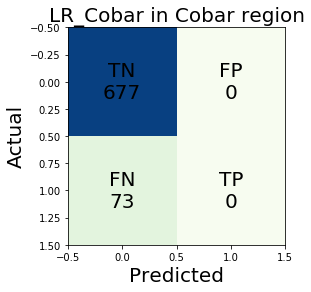

In [244]:
#Confusion matrix dla LR_Cobar i danych testowych tego regionu

plt.figure()
cm_Cobar = confusion_matrix(Will_rain_Cobar_test, LR_Cobar.predict(test_Cobar.iloc[:,1:]))
plt.imshow(cm_Cobar, interpolation='nearest', cmap=plt.cm.GnBu)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("LR_Cobar in Cobar region", fontsize=20)
s= [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm_Cobar[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

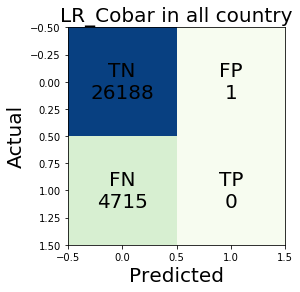

In [245]:
#Confusion matrix dla LR_Cobar i danych testowych całego kraju

plt.figure()
cm_Cobar2 = confusion_matrix(Y_test[(X_test['Location']!='Cobar')], LR_Cobar.predict(X_test[(X_test['Location']!='Cobar')].iloc[:,1:]))
plt.imshow(cm_Cobar2, interpolation='nearest', cmap=plt.cm.GnBu)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("LR_Cobar in all country", fontsize=20)
s= [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm_Cobar2[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

<div style = "text-align: justify">Model ten jest nieużyteczny "życiowo", tzn. zakłada, że niemal we wszystkich przypadkach nie będzie padać, a że w całym kraju stosunkowo rzadko pada - najczęściej się nie myli. Należałoby jeszcze poszukać modelu, który rzeczywiście przewiduje pogodę, a nie przypisuje wszystkim przypadkom wartość dominanty.